Libraries/ Modules used for the analysis will be imported in the following cells:

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install missingno
import missingno as msno

!pip install kmodes
from kmodes.kprototypes import KPrototypes

!pip install shap
import shap

!pip install lightgbm
from lightgbm import LGBMClassifier

  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached scipy-1.7.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.4 MB)
  Using cached matplotlib-3.4.3-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached numpy-1.21.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.8 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached Pillow-8.3.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (3.0 MB)
  Using cached kiwisolver-1.3.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached pandas-1.3.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)


Customs Functions used for the analysis will be shown in the following cell.

In [486]:
def unique_classes(df):
    """takes in a dataframe, returns a dictionary containing classes of each categical column"""
    unique={}
    for col in df.columns:
        if df[col].dtype.name=='object':
            unique[col]=df[col].unique()      
    return unique

def freq_dist(df,col):
    """takes in a dataframe and a categorical column, returns a seaborn count plot of the column"""
    sns.set()
    fig,ax=plt.subplots(figsize=(15,6))
    ax=sns.countplot(x=col,
                  data= df,
             order=df[col].value_counts().index,palette=['blue'],alpha=0.7)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_title(f'Distribution of {col} Feature',fontsize=18)

    
def draw_boxplots(df,col):
    """takes in a dataframe and a numerical column, returns seaborn boxplot of the column"""
    fig,ax=plt.subplots( figsize=(10,5))
    ax=sns.boxplot(x=df[col], data=df, palette=['blue'])
    ax.set_title(f'Boxplots of {col} ', fontsize=18)

Coffee Shop Dataset:

In [487]:
# import data as a pandas dataframe
df=pd.read_csv("data/coffee_shops.csv")

## Analysis

### Exploratory Data Analysis (EDA):

In [488]:
# check first few row of data
df.head(15)

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,Mariupol,Dim Kavu,Coffee store,4.6,206.0,NaN,NaN,NaN,NaN
1,Mariupol,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,Mariupol,Кофейня Світ Чаю,Coffee shop,5.0,11.0,NaN,NaN,NaN,True
3,Mariupol,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,NaN,NaN,True,True
5,Mariupol,Racers Coffee Shop,Espresso bar,4.6,367.0,$$,False,True,True
6,Mariupol,Займемся Кофе,Coffee shop,4.6,200.0,$$,False,True,True
7,Mariupol,Кофейня Rit Rit,Coffee shop,4.6,292.0,$$,False,NaN,True
8,Mariupol,Кав'ярня My coffee,Coffee shop,4.8,31.0,NaN,NaN,True,True
9,Mariupol,LENЬ. Coffee & desserts.,Coffee shop,4.8,125.0,$$,True,True,True


In [489]:
# Check the datatype of eacch column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            122 non-null    object 
 6   Delivery option  129 non-null    object 
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: float64(2), object(7)
memory usage: 14.2+ KB


In [490]:
# Describe dataset inlcuding both nuermerical and categorical values
df.describe(include='all')

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
count,200,200,200,198.000000,198.000000,122,129,140,144
unique,10,187,14,NaN,NaN,3,2,1,1
top,Mariupol,Dim Kavy,Coffee shop,NaN,NaN,$$,False,True,True
freq,20,4,97,NaN,NaN,116,94,140,144
mean,NaN,NaN,NaN,4.663636,622.494949,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.221648,1400.898666,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,3.900000,3.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,4.600000,47.500000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.700000,271.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.800000,786.250000,NaN,NaN,NaN,NaN


The above table shows some useful information. For example:

- The data contains mixed datatype (# Find classes in each category 
unique_classes(df) numerical and categorical/ text)
- There are 200 rows or observations in the data. However, there are missing data in some columsn (Price, Delivery Options, Dine in Option, Takeout options) 
- There are 14 different Place Type. We are only focusing on coffee shops. So we might need to delete rows that are not coffee shops.
- There are bout 622 average reviees, with 1973 is the maximum and 3 is the minium number of reviews.
- Average Ratings is 4.66 out of 5.
- Most of the shops are located in Kharkiv
- There are more than one place called 'Dim Kavy'. 
- most shopt offere take-out options.
- Most shops offer dine-in options.



In [491]:
# Find classes in each category using the custom function.
unique_classes(df)

{'Region': array(['Mariupol', 'Poltava', 'Kherson', 'Zaporozhye', 'Odessa', 'Lviv',
        'Khrivoy Rog', 'Kiev', 'Kharkiv', 'Dnipro'], dtype=object),
 'Place name': array(['Dim Kavu', 'Коферум', 'Кофейня Світ Чаю', 'Кофейня Starcoff',
        'Кофейня "Friend Zone"', 'Racers Coffee Shop', 'Займемся Кофе',
        'Кофейня Rit Rit', "Кав'ярня My coffee",
        'LENЬ. Coffee & desserts.', 'SOVA COFFEE', 'Кава Тайм',
        'Skver кафе', 'Кафе на Георгіївській', 'Khosper',
        'Lekontina Шоколадна Майстерня', 'Lecker', 'Veterano Coffee',
        'VEIN', 'Coffee Drive', 'G COFFEE', 'Kavun', 'Buns Brew Bar',
        'Coffee House', '"Точка кофе"', 'Your Coffee', 'KOFEiN',
        "Perfect Coffee, КАВ'ЯРНЯ", 'Misceva kavyarnya', 'Dzhi',
        'Gangster coffee shop', 'Crema Caffe Poltava', 'COFFBOY',
        'Wake Up Coffee', 'Lviv Handmade Chocolate',
        'ПЕРША ДЕГУСТАЦІЙНА ЗАЛА КАВИ "GANGSTER_COFFEE SHOP 3"',
        'Aroma kava', 'Koffishka', 'ЗАКУТОК - coffee hookah point'

We are mostly interested in Place type, Price, Delivery option,Dine in option, adn Takeout option categories as the entrire area (region) is our market, and we are not considering name of the business for our current analysis

It looks like there are more than one typ eof place in the data set. Let's check out each type and their frequencies.

In [492]:
df['Place type'].value_counts()

Coffee shop                 97
Cafe                        58
Espresso bar                20
Coffee store                11
Store                        3
Coffee roasters              2
Pastry shop                  2
Coffee stand                 1
Internet shop                1
E-commerce service           1
Chocolate shop               1
European restaurant          1
Appliance repair service     1
Restaurant                   1
Name: Place type, dtype: int64

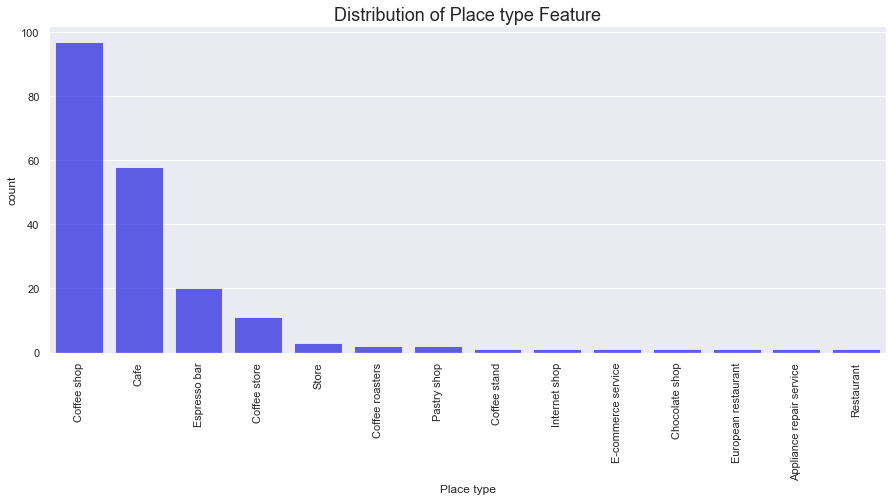

In [493]:
freq_dist(df,'Place type')

Clearly, there are more that one type of shops.
Let's see if there are shops with same name:

In [494]:
df['Place name'].value_counts()

Dim Kavy                                     4
coffee House                                 3
Coffee House                                 3
Lviv Coffee Manufacture                      2
Kaffa                                        2
                                            ..
Coffeetory Кофетория                         1
SOVA COFFEE                                  1
Coffeeсть                                    1
Art Coffee - Інтернет Магазин Кави та Чаю    1
Don Marco                                    1
Name: Place name, Length: 187, dtype: int64

Let's check what type of shop 'Dim Kavy' is:

In [495]:
df[df['Place name']=='Dim Kavy' ]

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
66,Zaporozhye,Dim Kavy,Espresso bar,4.8,118.0,$$,NaN,NaN,NaN
171,Kharkiv,Dim Kavy,Espresso bar,4.7,185.0,$$,NaN,NaN,NaN
172,Kharkiv,Dim Kavy,Coffee store,4.7,222.0,NaN,NaN,True,True
181,Dnipro,Dim Kavy,Store,4.9,39.0,NaN,NaN,NaN,NaN


It's apparent that same brand has different type of shops. A quick google search shows that there are really no different between a Dim Kavy in Kharkiv and a Dim Kvay in Zaporozhye. To make the dataset look better and reduce the type of place we will in future combine the lower frequecy catergory into 'other' catergory.

### Examine missing value :

<AxesSubplot:>

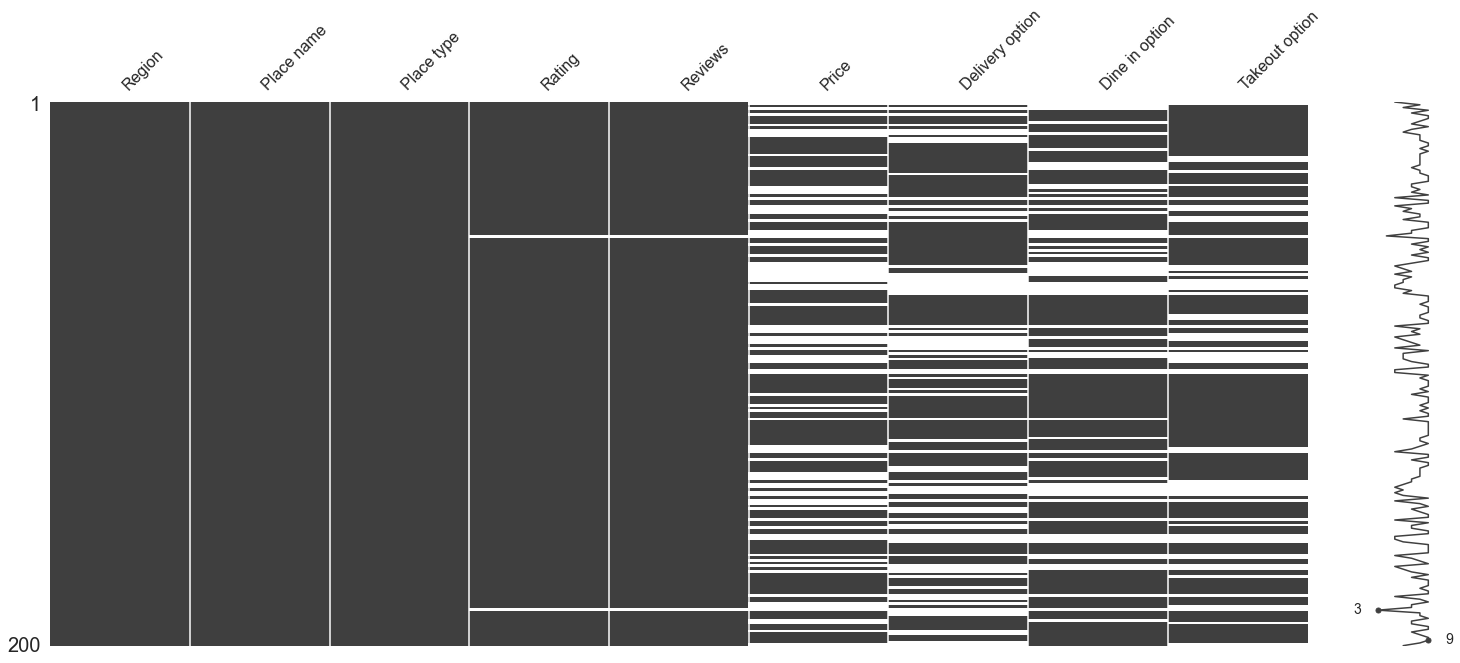

In [496]:
#Visualize missing values and their location in dataframe
msno.matrix(df)

In [497]:
df['Dine in option'].value_counts()

True    140
Name: Dine in option, dtype: int64

In [498]:
df['Takeout option'].value_counts()

True    144
Name: Takeout option, dtype: int64

In [499]:
df['Delivery option'].value_counts()

False    94
True     35
Name: Delivery option, dtype: int64

In [500]:
df['Price'].value_counts()

$$     116
$$$      4
$        2
Name: Price, dtype: int64

It is apparent from the above lines of code that, missing value in Dine in option is most likey associated with 'no' dine in option. The same is true for the take out option. However, there are both True and False in delivery option and Price. Although, both of these catgories are important, we will not include them in our analysis. In addition, there are only two missing value in reviews and ratings. Instead of filling those values, we will drop them.

In [501]:
df[['Dine in option','Takeout option']]=df[['Dine in option','Takeout option']].fillna(value=False)
df.drop(['Price', 'Delivery option'], axis=1, inplace=True)
df.dropna(inplace=True)

Re-check the missing value in the column:

In [502]:
df.isna().sum()

Region            0
Place name        0
Place type        0
Rating            0
Reviews           0
Dine in option    0
Takeout option    0
dtype: int64

Now let's explore the distribution of the data

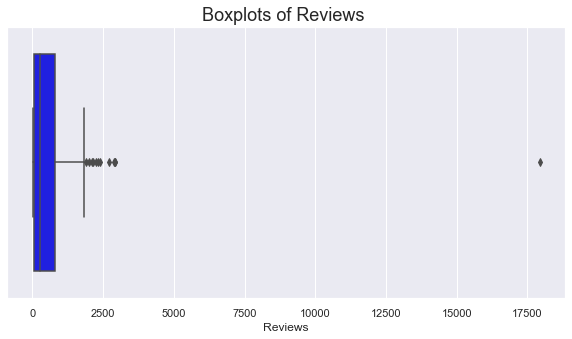

In [503]:
#draw boxplot to see if there are any outlienr, using custom funcitons
draw_boxplots(df,'Reviews')

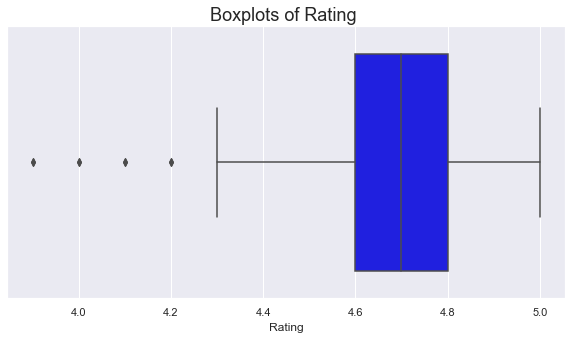

In [504]:
draw_boxplots(df,'Rating')

In [505]:
# We will delete the outlier and redraw boxplots

In [506]:
df.drop(df[df['Reviews'] ==df.Reviews.max()].index, inplace = True)
df.drop(df[df['Rating'] >=df.Rating.max()].index, inplace = True)

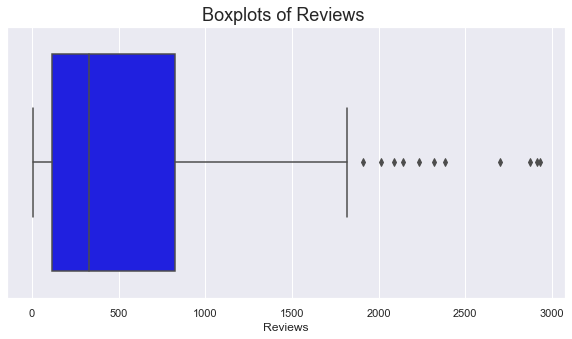

In [507]:
draw_boxplots(df,'Reviews')

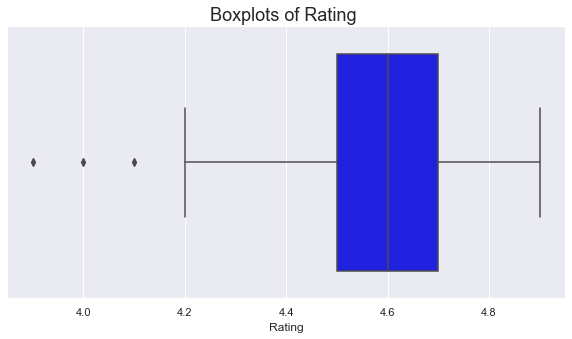

In [508]:
draw_boxplots(df,'Rating')

Check distribution for both categorical and numerical features

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

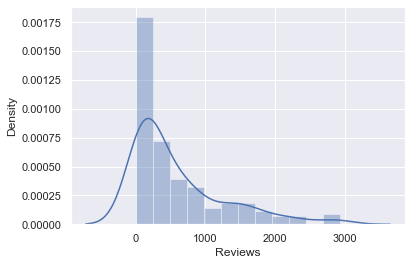

In [509]:
sns.distplot(df['Reviews'])

<AxesSubplot:xlabel='Rating', ylabel='Density'>

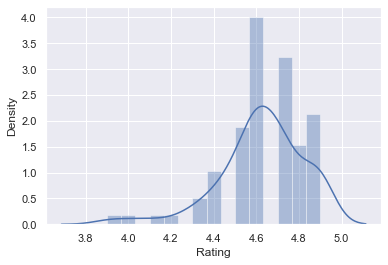

In [510]:
sns.distplot(df['Rating'])

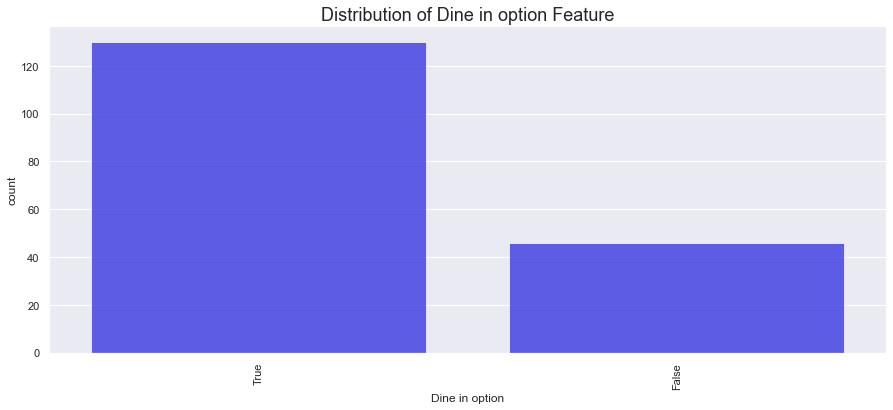

In [511]:
freq_dist(df,'Dine in option')

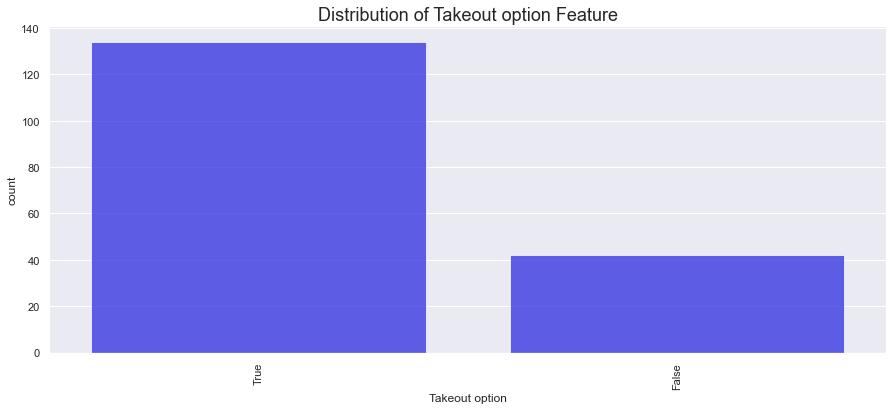

In [512]:
freq_dist(df,'Takeout option')

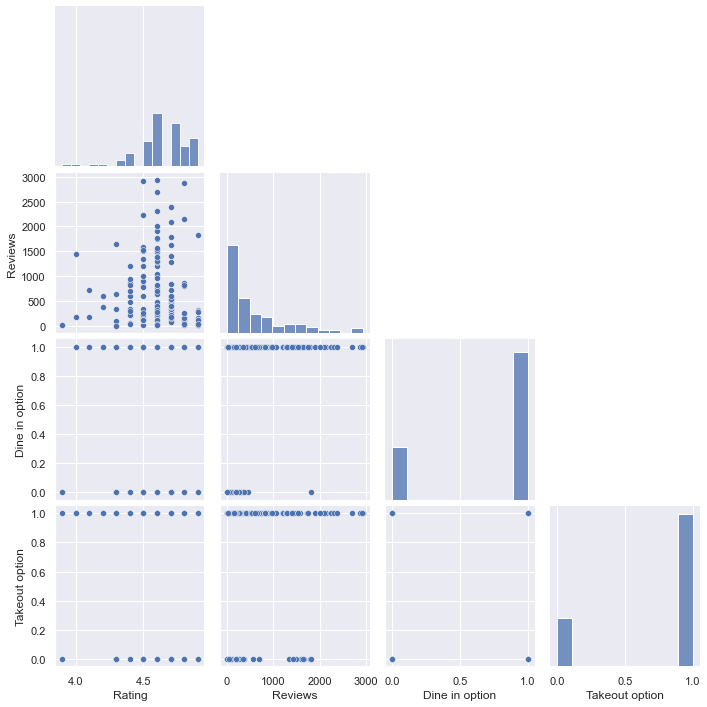

In [513]:
# Check out if there is any correlation between numerical variables
ax=sns.pairplot(df,corner=True) # we do not need the upper righ of the plot

### Segmentation / Clustering

### Data Preprocessing 

In [514]:
Scaler=StandardScaler()

In [515]:
df_new=df.copy()

In [516]:
df_new[['Rating','Reviews']]=Scaler.fit_transform(df_new[['Rating','Reviews']])

In [517]:
X_=df_new.drop(['Region','Place name', 'Place type'], axis=1)

In [518]:
#This is our feature data
X=np.array(X_)

# Perform K-Prototype cluster

Since we have mixed datatype, we will perform a K-Prototype clustering analysis. 

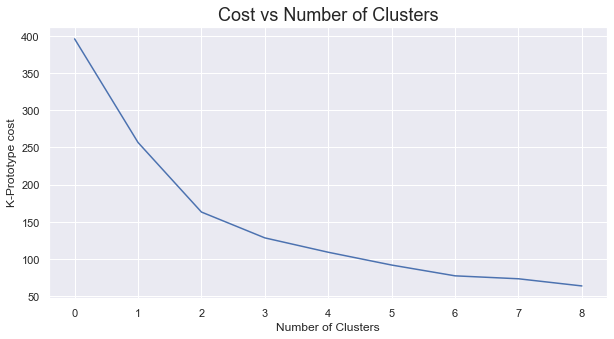

In [519]:
# Find number of cluster using Elbow method
cost = []
fig,ax=plt.subplots( figsize=(10,5))
for num_clusters in list(range(1,10)):
    kproto = KPrototypes(n_clusters=num_clusters,random_state=42, n_jobs=-1)
    kproto.fit_predict(X, categorical=[2,3])
    cost.append(kproto.cost_)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('K-Prototype cost')
ax.set_title("Cost vs Number of Clusters", fontsize=18)
plt.plot(cost)

It is apparent from the above cost vs number of cluser plot that we need 3 clusters

In [520]:
# help(KPrototypes)

In [521]:
# Create KPrototype model object and use fit-predict method
model = KPrototypes(n_clusters=3,  random_state=42, n_jobs=-1)
model.fit_predict(X, categorical=[2,3])
#cost of the KPrototype Model
print(model.cost_)
#new column for cluster labels associated with each subject
df_new['labels'] = model.labels_

163.146863922598


In [522]:
df_new

,Region,Place name,Place type,Rating,Reviews,Dine in option,Takeout option,labels
0,Mariupol,Dim Kavu,Coffee store,-0.116689,-0.577215,False,False,0
3,Mariupol,Кофейня Starcoff,Coffee shop,-1.118506,-0.391085,True,True,1
5,Mariupol,Racers Coffee Shop,Espresso bar,-0.116689,-0.337479,True,True,0
6,Mariupol,Займемся Кофе,Coffee shop,-0.116689,-0.586149,True,True,0
7,Mariupol,Кофейня Rit Rit,Coffee shop,-0.116689,-0.449158,False,True,0
...,...,...,...,...,...,...,...,...
195,Dnipro,Artist,Restaurant,-0.116689,0.549989,True,True,2
196,Dnipro,Dream Cafe,Cafe,-1.619414,0.077963,True,True,1
197,Dnipro,РУТА КАФЕ ПП КУЛІЧЕНКО К.І.,Cafe,-0.116689,-0.860133,True,True,0
198,Dnipro,Ob'yektna Kava,Coffee shop,0.384220,0.007978,True,True,0


In [523]:
df_new.labels.value_counts()

0    101
1     40
2     35
Name: labels, dtype: int64

Text(0.5, 1.0, 'Segementation on 2D Features')

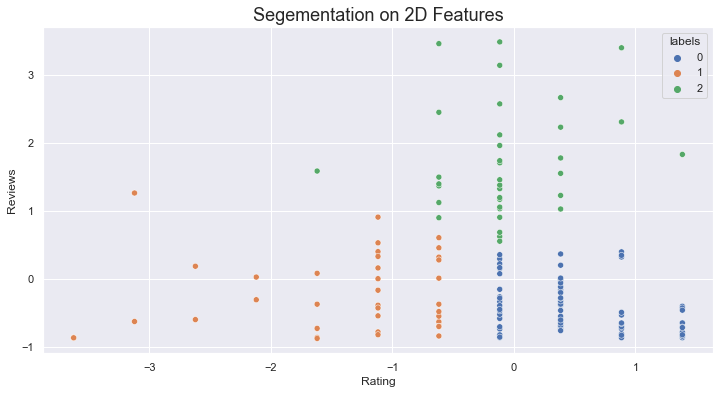

In [524]:
fig,ax=plt.subplots( figsize=(12,6))
sns.scatterplot(data=df_new,x='Rating', y='Reviews',hue='labels',palette="deep",legend="full" )
ax.set_title("Segementation on 2D Features", fontsize=18)

Three disttinct segsments are shown in the above figure

In [525]:
place_type=df['Place type']

In [526]:
labels=model.labels_

In [527]:
df_f=pd.DataFrame({'labels': labels,'Type': place_type})

In [528]:
#Create a crosstable
ct=pd.crosstab(df_f.labels,df_f.Type)
ct

Type,Cafe,Chocolate shop,Coffee roasters,Coffee shop,Coffee stand,Coffee store,Espresso bar,European restaurant,Pastry shop,Restaurant,Store
labels,,,,,,,,,,,
0,22,0,0,56,0,8,12,0,1,0,2
1,18,0,0,17,1,1,3,0,0,0,0
2,10,1,1,14,0,1,5,1,1,1,0


In [529]:
#Locaiton of the centroids in the cluster
model.cluster_centroids_

array([[ 0.55780164, -0.49167631,  1.        ,  1.        ],
       [-1.3439145 , -0.25245515,  1.        ,  1.        ],
       [-0.07375388,  1.70735754,  1.        ,  1.        ]])

### Evalaution / Feature Importance
Since we have mixed dataset, we will use LGBM classifier that can use both numerical and categorical data

In [530]:
# Create a LGBM Classifier
clf = lgb.LGBMClassifier()

In [531]:
# Find F1 Score
cv_scores_kp = cross_val_score(clf,X, model.labels_, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')


CV F1 score for K-Prototypes clusters is 0.9884693877551021


In [532]:
clf.fit(X, model.labels_)

LGBMClassifier()

In [533]:
explainer_kp = shap.TreeExplainer(clf)
shap_values_kp = explainer_kp.shap_values(X)

C extension was not built during install!


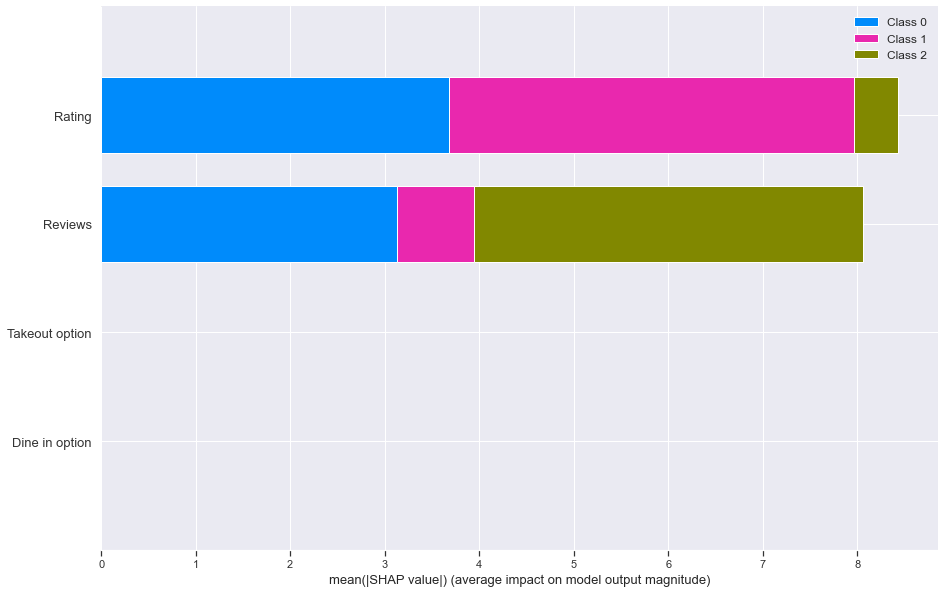

In [534]:
shap.summary_plot(shap_values_kp, X_, plot_type="bar", plot_size=(15, 10))


# Future Work:

We need price and delivery option data to better understand and better form our segmentation analysis.
In the future, we need to do the followings:
- Use only numerical features and use other methods such as K-means and hierarchical clustering to understand how clustering work.
- We need to use price and delivery data and re-do the clustering with mixed data to see if we can obtain better segmentation.
 